In [1]:
# ref: https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

11493376/11490434 [==============================] - 1s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


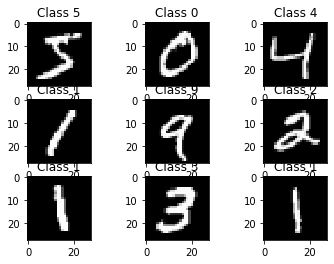

In [4]:
#plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [5]:

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [6]:
nb_classes = 10 # number of classification outputs 0..9
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [7]:
Y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [8]:
Y_train.shape

(60000, 10)

In [9]:
y_train.shape

(60000,)

In [10]:

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [14]:
# API doc https://keras.io/api/models/model_training_apis/
model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=4,
          #show_accuracy=True, verbose=1,
          validation_data=(X_test, Y_test))

C:\Users\haiho\anaconda3\envs\CPE 49033\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 10s 160us/step - loss: 0.2554 - val_loss: 0.1101
Epoch 2/4
60000/60000 [==============================] - 9s 144us/step - loss: 0.1022 - val_loss: 0.0770
Epoch 3/4
60000/60000 [==============================] - 9s 145us/step - loss: 0.0726 - val_loss: 0.0704
Epoch 4/4
60000/60000 [==============================] - 9s 148us/step - loss: 0.0548 - val_loss: 0.0664


In [18]:
score = model.evaluate(X_test, Y_test,
                       verbose=0)


In [21]:
score

0.06638288774515967

In [22]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

In [23]:
predicted_classes.shape

(10000,)

In [24]:
predicted_classes[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [25]:
correct_indices = np.nonzero(predicted_classes == y_test)[0] #need [0] to grb first of two arrays with indices
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [26]:
correct_indices.shape

(9798,)

In [27]:
incorrect_indices.shape

(202,)

In [29]:
incorrect_indices[0:5]

array([115, 151, 247, 321, 340], dtype=int64)

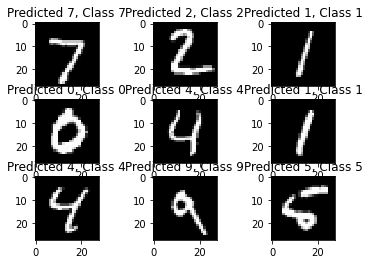

In [30]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

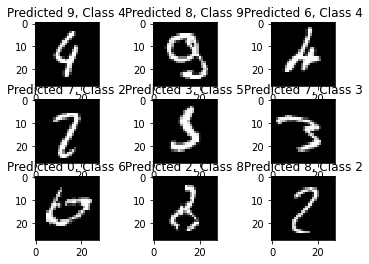

In [31]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))


In [47]:
z=np.nonzero(predicted_classes != y_test) # will not work

#help(np.nonzero)
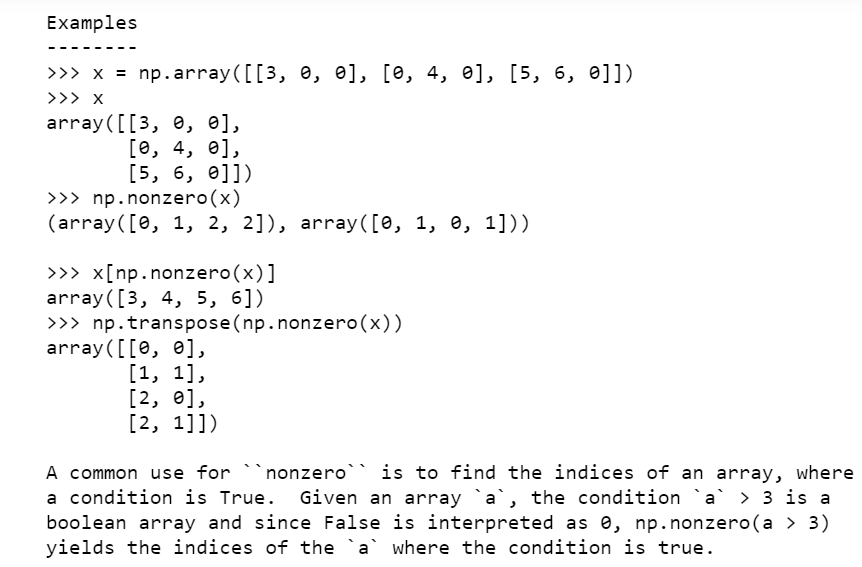

In [53]:
incorrect_indices[0:9]

array([115, 151, 247, 321, 340, 381, 445, 582, 613], dtype=int64)